# 3rd Tutorial: Network Analysis with *NetworkX*

This content is largely based on 
* ["Complessita' nei sistemi sociali"](https://github.com/lordgrilo/complexity-book) course at UniTo
* [NetworkX Gallery Examples](https://networkx.org/documentation/stable/auto_examples/index.html)


## Building Intuitions

...

* ...
* ...
* ...

In [1]:
%matplotlib inline

import networkx as nx
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns
import random
import operator
from scipy.stats import spearmanr
import networkx.algorithms.centrality as nc
import math

print(f'NetworkX version: {nx.__version__}')
print(f'Matplotlib version: {mtp.__version__}')

SEED = 89


NetworkX version: 2.8.4
Matplotlib version: 3.6.2


### Create an empy graph, adding nodes and edges

In [2]:
G = nx.Graph()
# Nodes
G.add_node(1)
G.add_nodes_from([2,3,4])
G.add_nodes_from([
    (5, {'color':'red'}),
    (6, {'color':'green'}),
])
#Edges
G.add_edge(1,2)
G.add_edges_from([
    (1,5),
    (3,4),
    (1,6),
    (6,3),
    (4,5),
])

### Drawing graph

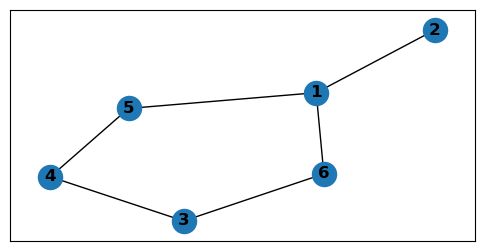

In [3]:
plt.figure(figsize=(6,3))
nx.draw_networkx(G, with_labels=True, font_weight='bold')
# nx.draw_networkx(G, with_labels=True, font_weight='bold')
plt.show()

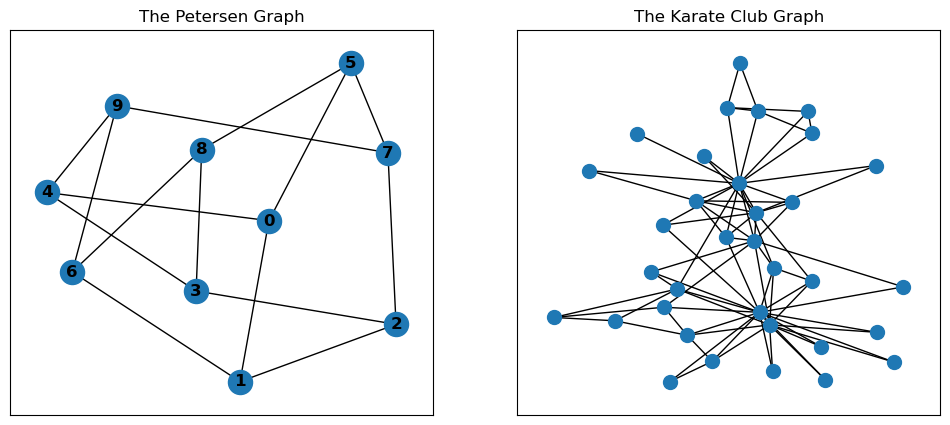

In [4]:
G = nx.petersen_graph()
K = nx.karate_club_graph()
plt.figure(figsize=(12,5))
subax1 = plt.subplot(121)
nx.draw_networkx(G, with_labels=True, font_weight='bold')
plt.title('The Petersen Graph')
subax2 = plt.subplot(122)
nx.draw_networkx(K, with_labels=False, font_weight='bold', node_size=100)
plt.title('The Karate Club Graph')
plt.show()

### Graph properties

- eccentricity: *The eccentricity of a node v is the maximum distance from v to
all other nodes in G*
- radius: *The radius is the minimum eccentricity*

- diameter: *The diameter is the maximum eccentricity*

- center: *The center is the set of nodes with eccentricity equal to radius*
- periphery:*The periphery is the set of nodes with eccentricity equal to the diameter*
- density: *The density for directed graphs is `d = \frac{m}{n(n-1)}`, where `n` is the number of nodes and `m`  is the number of edges in `G`*
- average shortest path length: *The average shortest path length is  `a =\sum_{s,t \in V} \frac{d(s, t)}{n(n-1)}` where `V` is the set of nodes in `G`, `d(s, t)` is the shortest path from `s` to `t`, and `n` is the number of nodes in `G`.*

In [5]:
print('The Petersen Graph properties:')
print(f"radius: {nx.radius(G)}")
print(f"diameter: {nx.diameter(G)}")
print(f"eccentricity: {nx.eccentricity(G)}")
print(f"center: {nx.center(G)}")
print(f"periphery: {nx.periphery(G)}")
print(f"density: {nx.density(G):.5}")
print(f'average shortest path length: {nx.average_shortest_path_length(G):.5}')
print('-'*100)
print('The Karate Club Graph properties:')
print(f"radius: {nx.radius(K)}")
print(f"diameter: {nx.diameter(K)}")
print(f"eccentricity: {nx.eccentricity(K)}")
print(f"center: {nx.center(K)}")
print(f"periphery: {nx.periphery(K)}")
print(f"density: {nx.density(K):.5}")
print(f'average shortest path length: {nx.average_shortest_path_length(K):.5}')


The Petersen Graph properties:
radius: 2
diameter: 2
eccentricity: {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2}
center: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
periphery: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
density: 0.33333
average shortest path length: 1.6667
----------------------------------------------------------------------------------------------------
The Karate Club Graph properties:
radius: 3
diameter: 5
eccentricity: {0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4}
center: [0, 1, 2, 3, 8, 13, 19, 31]
periphery: [14, 15, 16, 18, 20, 22, 23, 26, 29]
density: 0.13904
average shortest path length: 2.4082


### Example of Network Centrality Measures

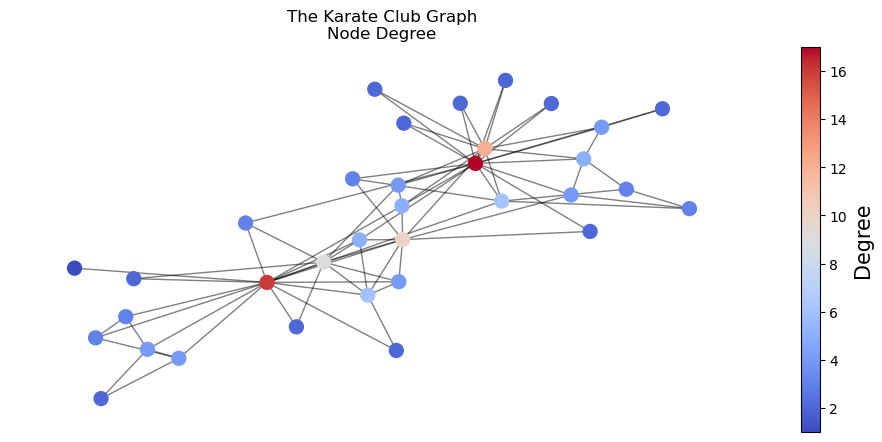

In [6]:
plt.figure(figsize=(12,5))

if True:
    property2color = list(dict(nx.degree(K)).values())
    pro2color_name = 'Degree'
if False:
    property2color = list(dict(nx.eccentricity(K)).values())
    pro2color_name = 'Eccentricity'
if False:
    property2color = list(dict(nx.betweenness_centrality(K)).values())
    pro2color_name = 'Betweenness Centrality'
if False:
    property2color = list(dict(nx.closeness_centrality(K)).values())
    pro2color_name = 'Closeness Centrality'
if False:
    property2color = list(dict(nx.pagerank_numpy(K)).values())
    pro2color_name = 'PageRank'


pos=nx.spring_layout(K, seed=SEED)
s=nx.draw_networkx_nodes(K,
            pos,
            node_size=100.0,
            node_color=property2color,
            alpha=1,
            cmap=plt.cm.coolwarm
            )
nx.draw_networkx_edges(K, pos, alpha=0.5)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel(f'{pro2color_name}', size=15)
plt.axis('off')
plt.title(f'The Karate Club Graph\nNode {pro2color_name}')
plt.show()

### Random Walks a.k.a. PageRank

#### Ref: [The PageRank citation ranking: Bringing order to the web.](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf)
##### Page, Lawrence and Brin, Sergey and Motwani, Rajeev and Winograd, Terry. 1999, Stanford InfoLab.

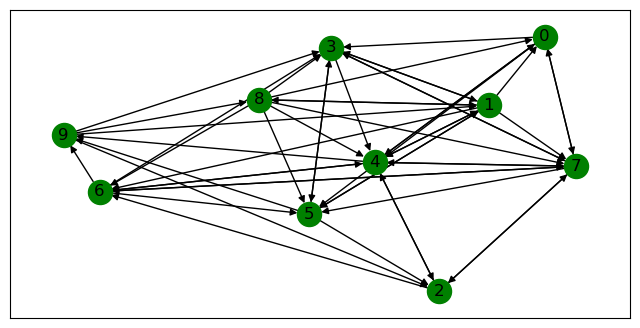

In [7]:
# select random graph using gnp_random_graph() function of networkx
Graph = nx.gnp_random_graph(10, 0.5, directed=True)
plt.figure(figsize=(8, 4))
nx.draw_networkx(Graph, with_labels=True, node_color="green")  # draw the network graph
plt.show()  # to show the graph by plotting it


In [8]:
# random_node is the start node selected randomly
random_node = random.choice([i for i in range(Graph.number_of_nodes())])

dict_counter = {}  # initialise the value for all nodes as 0
for i in range(Graph.number_of_nodes()):
    dict_counter[i] = 0

# increment by traversing through all neighbors nodes
dict_counter[random_node] = dict_counter[random_node] + 1

walk_bundget = int(1e4)
# Traversing through the neighbors of start node
for i in range(walk_bundget):
    list_for_nodes = list(Graph.neighbors(random_node))
    if len(list_for_nodes) == 0:  # if random_node having no outgoing edges
        random_node = random.choice([i for i in range(Graph.number_of_nodes())])
        dict_counter[random_node] = dict_counter[random_node] + 1

    else:
        random_node = random.choice(
            list_for_nodes
        )  # choose a node randomly from neighbors
        dict_counter[random_node] = dict_counter[random_node] + 1

In [9]:
# using pagerank() method to provide ranks for the nodes
rank_node = nx.pagerank_numpy(Graph)

# sorting the values of rank and random walk of respective nodes
sorted_rank = sorted(rank_node.items(), key=operator.itemgetter(1))
sorted_random_walk = sorted(dict_counter.items(), key=operator.itemgetter(1))

print('PageRank\t\t\tRandomWalk')
for (pr, rw) in zip(sorted_rank,sorted_random_walk):print(f' {pr}\t {rw}') 

PageRank			RandomWalk
 (8, 0.043769508117347575)	 (8, 328)
 (0, 0.07218691115911872)	 (0, 643)
 (9, 0.0749250580437643)	 (9, 752)
 (2, 0.09357949991824391)	 (2, 978)
 (6, 0.09870110280262126)	 (6, 1015)
 (1, 0.10580650938980415)	 (1, 1038)
 (5, 0.11121795788561661)	 (5, 1068)
 (3, 0.1243491536252454)	 (3, 1257)
 (4, 0.13773214952911902)	 (4, 1460)
 (7, 0.13773214952911902)	 (7, 1462)


/var/folders/9r/b0qy7dk94d140bb3f8f1822c0000gn/T/ipykernel_36010/132589764.py:2: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  rank_node = nx.pagerank_numpy(Graph)
/Users/darioc/git_repos/Symmetries/env/lib/python3.10/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


In [10]:
print(spearmanr([x[0] for x in sorted_rank], [x[0] for x in sorted_random_walk]))


SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)


### Clustering - Community detection

In [11]:
def updateGraph1(G):
    ebw = nc.edge_betweenness(G)
    maxs = 0
    for k, v in ebw.items():
        if maxs < v:
            medge, maxs = k, v
    G.remove_edge(medge[0], medge[1])

def updateGraph2(G):
    ebw = nc.edge_betweenness(G)
    edge_list = sorted(ebw.items(), key=operator.itemgetter(1))
    medge = edge_list[-1][0]
    G.remove_edge(medge[0], medge[1])

In [12]:
# Find the partition that defines two communities in the Karate Club Graph
while nx.is_connected(K):
    # we remove links until the graph is connected
    updateGraph1(K)
    # updateGraph2(K)

print(f'Is the network K connected: {nx.is_connected(K)}')
communities = [i for i in nx.connected_components(K)]
for ii,_ in enumerate(communities): print(f'Community_{ii}:\t{_}')

Is the network K connected: False
Community_0:	{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}
Community_1:	{2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


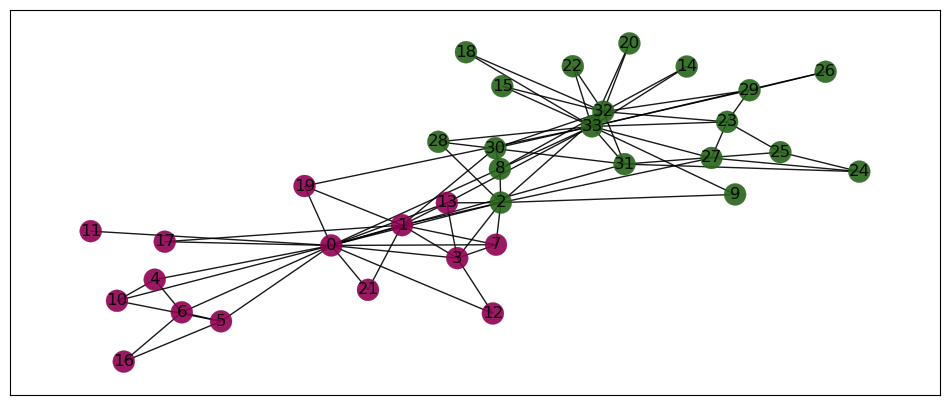

In [13]:
K = nx.karate_club_graph()

color_community = []
for i in range(0, len(K)):
    if i in communities[0]:
        color_community.append(1)
    else:
        color_community.append(2)

plt.figure(figsize=(12,5))
nx.draw_networkx(
    K,
    pos,
    node_color=color_community,
    cmap=plt.cm.PiYG,
    with_labels=True,
    alpha=0.9,
    node_size=250.0,
    linewidths=0.2
)


In [14]:
# Disparity filtering
#TODO Ref git: https://github.com/aekpalakorn/python-backbone-network
#TODO Ref paper: https://www.pnas.org/doi/10.1073/pnas.0808904106

### Beam Search

In [15]:
def progressive_widening_search(G, source, value, condition, initial_width=1, alpha=.2):
    """Progressive widening beam search to find a node.

    The progressive widening beam search involves a repeated beam
    search, starting with a small beam width then extending to
    progressively larger beam widths if the target node is not
    found. This implementation simply returns the first node found that
    matches the termination condition.

    `G` is a NetworkX graph.

    `source` is a node in the graph. The search for the node of interest
    begins here and extends only to those nodes in the (weakly)
    connected component of this node.

    `value` is a function that returns a real number indicating how good
    a potential neighbor node is when deciding which neighbor nodes to
    enqueue in the breadth-first search. Only the best nodes within the
    current beam width will be enqueued at each step.

    `condition` is the termination condition for the search. This is a
    function that takes a node as input and return a Boolean indicating
    whether the node is the target. If no node matches the termination
    condition, this function raises :exc:`NodeNotFound`.

    `initial_width` is the starting beam width for the beam search (the
    default is one). If no node matching the `condition` is found with
    this beam width, the beam search is restarted from the `source` node
    with a beam width that is twice as large (so the beam width
    increases exponentially). The search terminates after the beam width
    exceeds the number of nodes in the graph.

    `alpha` is the randomness injected into the beam source

    """
    # Check for the special case in which the source node satisfies the
    # termination condition.
    if condition(source):
        return source
    # The largest possible value of `i` in this range yields a width at
    # least the number of nodes in the graph, so the final invocation of
    # `bfs_beam_edges` is equivalent to a plain old breadth-first
    # search. Therefore, all nodes will eventually be visited.
    log_m = math.ceil(math.log2(len(G)))
    for ii,i in enumerate(range(log_m)):
        width = initial_width * pow(2, i)
        print(f'Search {ii} - width: {width}')
        # Since we are always starting from the same source node, this
        # search may visit the same nodes many times (depending on the
        # implementation of the `value` function).
        for u, v in nx.bfs_beam_edges(G, source, value, width):
            if condition(v):
                if random.uniform(0,1) < alpha:
                    return v
                else:
                    print(f'\tFound node {v} with centrality {value(v):.4}. Skipped to enhance search variance')
                    continue
    # At this point, since all nodes have been visited, we know that
    # none of the nodes satisfied the termination condition.
    raise nx.NodeNotFound("no node satisfied the termination condition")

Search started from node: 22
Search 0 - width: 1
	Found node 29 with centrality 0.1891. Skipped to enhance search variance
	Found node 35 with centrality 0.189. Skipped to enhance search variance
Search 1 - width: 2
	Found node 29 with centrality 0.1891. Skipped to enhance search variance
	Found node 9 with centrality 0.1644. Skipped to enhance search variance
	Found node 35 with centrality 0.189. Skipped to enhance search variance
	Found node 28 with centrality 0.1881. Skipped to enhance search variance
	Found node 33 with centrality 0.1885. Skipped to enhance search variance
	Found node 42 with centrality 0.1799. Skipped to enhance search variance
Search 2 - width: 4
	Found node 29 with centrality 0.1891. Skipped to enhance search variance
	Found node 9 with centrality 0.1644. Skipped to enhance search variance
Finally, found node 17 with centrality 0.1586


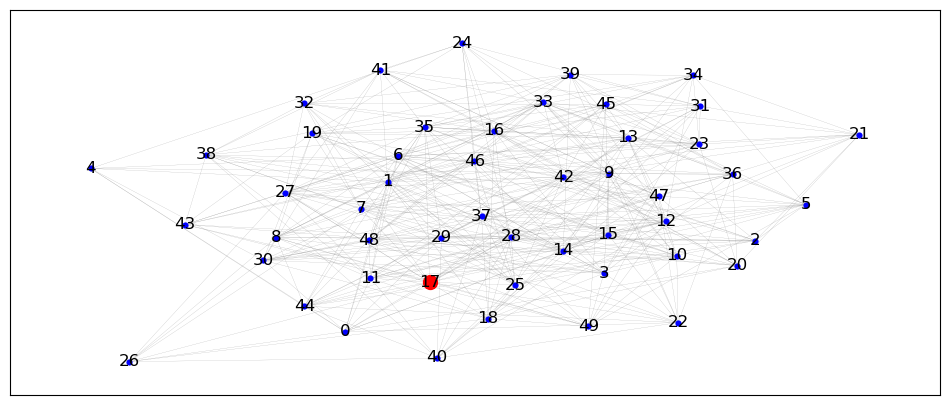

In [16]:
G = nx.gnp_random_graph(100, 0.5, seed=SEED)
G = nx.gnp_random_graph(50, 0.3, seed=SEED)
# G = nx.karate_club_graph()
# Centrality can be any node feature
centrality = nx.eigenvector_centrality(G)
# centrality = nx.degree(G)
# centrality = nx.betweenness_centrality(G)
centrality = dict(centrality)
avg_centrality = sum(centrality.values()) / len(G)


def has_high_centrality(v):
    return centrality[v] >= avg_centrality

source_node = random.sample(list(G.nodes),1)[0]
print(f'Search started from node: {source_node}')

found_node = progressive_widening_search(
    G, source=source_node, value=centrality.get, condition=has_high_centrality
)

c = centrality[found_node]
print(f"Finally, found node {found_node} with centrality {c:.4}")

# Draw graph
pos = nx.spring_layout(G, seed=SEED)
options = {
    "node_color": "blue",
    "node_size": 20,
    "edge_color": "grey",
    "linewidths": 0,
    "width": 0.1,
}
plt.figure(figsize=(12,5))
nx.draw_networkx(G, pos, **options)
# Draw node with high centrality as large and red
nx.draw_networkx_nodes(G, pos, nodelist=[found_node], node_size=100, node_color="r")
plt.show()